# Project

In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

ModuleNotFoundError: No module named 'google.colab'

### Imports

In [ ]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import pylab 
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from scipy.special import expit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# KÖR ALLT EN SISTA GÅNG MED KORREKT DATA - TRAIN OCH TEST 

### Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#df = pd.read_csv('understat.com.csv') #/content/drive/MyDrive/Project/understat.com.csv
df = pd.read_csv('/content/drive/MyDrive/Project/understat.com.csv')

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 1,position,team,matches,wins,draws,loses,scored,missed,pts,xG,xG_diff,npxG,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,94,102.980152,-7.019848,97.777212,28.444293,7.444293,24.727907,73.049305,5.683535,16.367593,489,114,94.0813,0.0813
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,92,95.766243,-22.233757,86.103895,42.607198,4.607198,38.890805,47.213090,10.209085,12.929510,351,153,81.7489,-10.2511
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,78,57.047670,-9.952330,52.588008,29.069107,0.069107,26.839271,25.748737,8.982028,9.237091,197,123,73.1353,-4.8647
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,77,55.062500,-14.937500,49.703978,39.392572,7.392572,33.446477,16.257501,8.709827,7.870225,203,172,63.7068,-13.2932
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,76,69.526624,-1.473376,62.094599,47.862742,2.862742,41.916529,20.178070,8.276148,9.477805,305,168,67.3867,-8.6133


In [ ]:
#df_per_game = pd.read_csv('understat_per_game.csv') #/content/drive/MyDrive/Project/understat_per_game.csv
df_per_game = pd.read_csv('/content/drive/MyDrive/Project/understat_per_game.csv')

In [ ]:
list(df_per_game.columns)

['league',
 'year',
 'h_a',
 'xG',
 'xGA',
 'npxG',
 'npxGA',
 'deep',
 'deep_allowed',
 'scored',
 'missed',
 'xpts',
 'result',
 'date',
 'wins',
 'draws',
 'loses',
 'pts',
 'npxGD',
 'ppda_coef',
 'ppda_att',
 'ppda_def',
 'oppda_coef',
 'oppda_att',
 'oppda_def',
 'team',
 'xG_diff',
 'xGA_diff',
 'xpts_diff']

## Train test split 

In [ ]:
train, validate, test = np.split(df_per_game.sample(frac=1, random_state=42),[int(.6*len(df_per_game)), int(.8*len(df_per_game))])

In [ ]:
train.head()

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,result,date,wins,draws,loses,pts,npxGD,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff
2350,Bundesliga,2017,h,1.843330,1.331010,1.843330,0.573238,6,4,0,1,1.8064,l,2017-09-20 17:30:00,0,0,1,0,1.270092,6.580645,204,31,10.074074,272,27,FC Cologne,1.843330,0.331010,1.8064
23255,Serie_A,2018,a,0.120965,2.013350,0.120965,1.252050,1,15,0,2,0.0863,l,2019-04-29 18:00:00,0,0,1,0,-1.131085,10.476190,220,21,11.133333,167,15,Udinese,0.120965,0.013350,0.0863
20070,Serie_A,2014,h,1.522290,0.493968,1.522290,0.493968,6,4,2,0,2.3291,w,2014-09-21 14:00:00,1,0,0,3,1.028322,11.695652,269,23,21.476190,451,21,Roma,-0.477710,0.493968,-0.6709
22169,Serie_A,2016,h,2.841680,0.467310,2.080380,0.467310,2,1,5,1,2.8076,w,2016-11-05 21:00:00,1,0,0,3,1.613070,7.606061,251,33,27.933333,419,15,Torino,-2.158320,-0.532690,-0.1924
21899,Serie_A,2016,h,1.655170,1.817580,1.655170,1.817580,11,1,1,3,1.2524,l,2016-10-15 17:00:00,0,0,1,0,-0.162410,14.400000,288,20,16.111111,290,18,Napoli,0.655170,-1.182420,1.2524


In [ ]:
y=train['wins']
y

2350     0
23255    0
20070    1
22169    1
21899    0
        ..
6000     1
10573    1
2837     1
17253    1
3757     1
Name: wins, Length: 14748, dtype: int64

In [ ]:
x=train['scored']
x

2350     0
23255    0
20070    2
22169    5
21899    1
        ..
6000     1
10573    2
2837     2
17253    3
3757     1
Name: scored, Length: 14748, dtype: int64

## Descriptive analasys

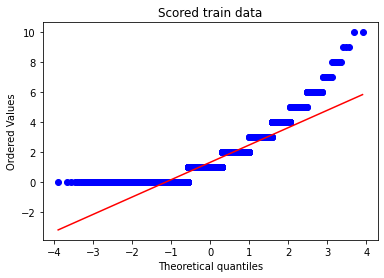

In [ ]:
# QQ plot
stats.probplot(x, dist="norm", plot=pylab)
plt.title('Scored train data')
plt.show()

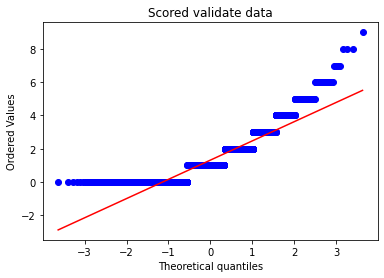

In [ ]:
stats.probplot(validate['scored'], dist="norm", plot=pylab)
plt.title('Scored validate data')
plt.show()

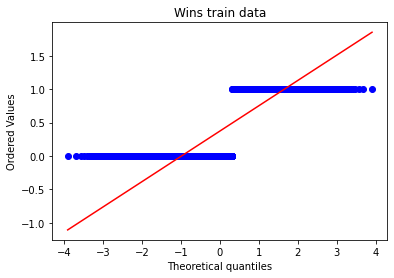

In [ ]:
stats.probplot(y, dist="norm", plot=pylab)
plt.title('Wins train data')
plt.show()

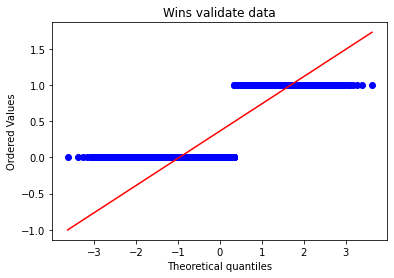

In [ ]:
stats.probplot(validate['wins'], dist="norm", plot=pylab)
plt.title('Wins validate data')
plt.show()

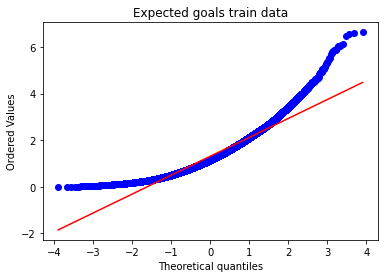

In [ ]:
stats.probplot(train['xG'], dist="norm", plot=pylab)
plt.title('Expected goals train data')
plt.show()

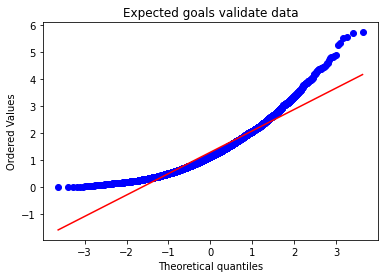

In [ ]:
stats.probplot(validate['xG'], dist="norm", plot=pylab)
plt.title('Expected goals validate data')
plt.show()

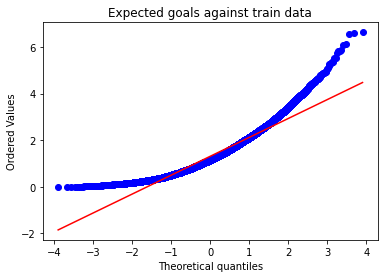

In [ ]:
stats.probplot(train['xGA'], dist="norm", plot=pylab)
plt.title('Expected goals against train data')
plt.show()

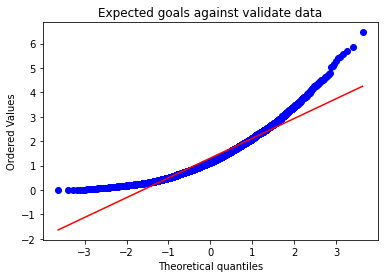

In [ ]:
stats.probplot(validate['xGA'], dist="norm", plot=pylab)
plt.title('Expected goals against validate data')
plt.show()

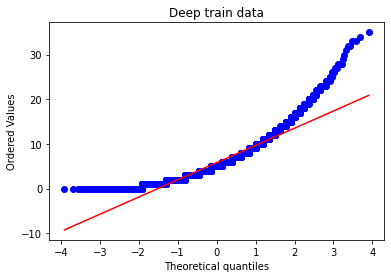

In [ ]:
stats.probplot(train['deep'], dist="norm", plot=pylab)
plt.title('Deep train data')
plt.show()

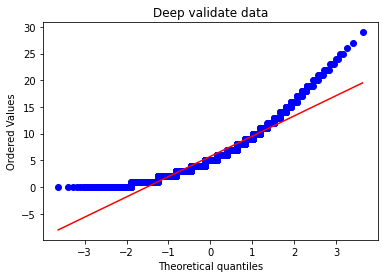

In [ ]:
stats.probplot(validate['deep'], dist="norm", plot=pylab)
plt.title('Deep validate data')
plt.show()

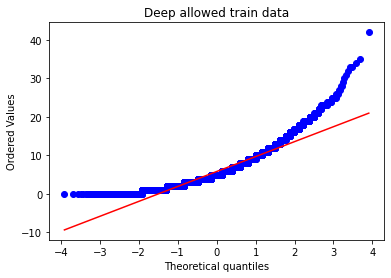

In [ ]:
stats.probplot(train['deep_allowed'], dist="norm", plot=pylab)
plt.title('Deep allowed train data')
plt.show()

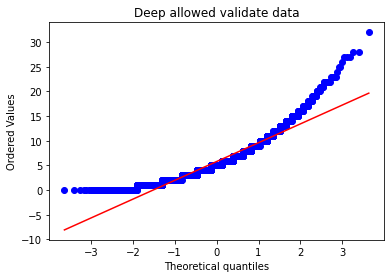

In [ ]:
stats.probplot(validate['deep_allowed'], dist="norm", plot=pylab)
plt.title('Deep allowed validate data')
plt.show()

In [ ]:
train[['wins','scored','xG','xGA','deep','deep_allowed']].describe().T

,count,mean,std,min,25%,50%,75%,max
wins,14748.0,0.372864,0.483583,0.0,0.000000,0.000000,1.000000,1.00000
scored,14748.0,1.341131,1.244089,0.0,0.000000,1.000000,2.000000,10.00000
xG,14748.0,1.309558,0.841825,0.0,0.683369,1.152130,1.767350,6.63049
xGA,14748.0,1.310584,0.840023,0.0,0.680590,1.155995,1.771797,6.63049
deep,14748.0,5.795633,4.058182,0.0,3.000000,5.000000,8.000000,35.00000
deep_allowed,14748.0,5.826417,4.080525,0.0,3.000000,5.000000,8.000000,42.00000


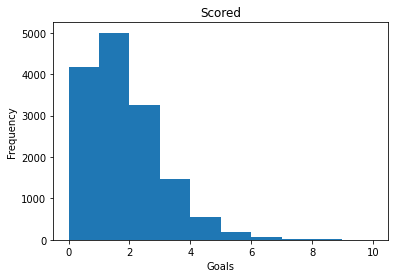

In [ ]:
plt.hist(x, bins=10)
plt.ylim()
plt.yticks()
plt.ylabel("Frequency")
plt.xlabel("Goals")
plt.title('Scored')
plt.show()

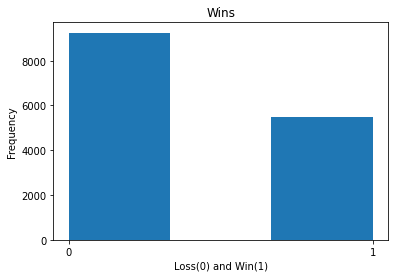

In [ ]:
plt.hist(y, bins=3)
plt.ylim()
plt.xlim()
plt.xticks([0,1])
plt.ylabel("Frequency")
plt.xlabel("Loss(0) and Win(1)")
plt.title('Wins')
plt.show()

Text(0.5, 1.0, 'Deep')

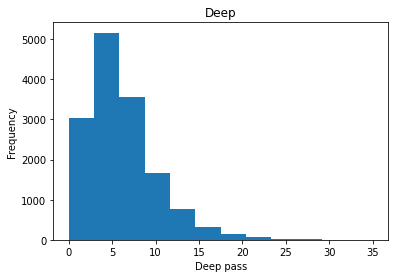

In [ ]:
plt.hist(train['deep'], bins=12)
plt.ylim()
plt.yticks()
plt.ylabel("Frequency")
plt.xlabel("Deep pass")
plt.title('Deep')

Text(0.5, 1.0, 'Deep allowed')

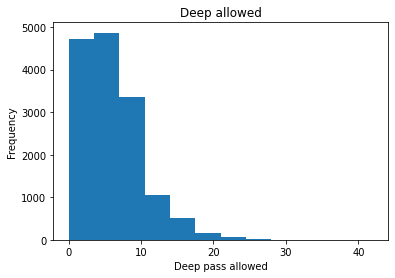

In [ ]:
plt.hist(train['deep_allowed'], bins=12)
plt.ylim()
plt.yticks()
plt.ylabel("Frequency")
plt.xlabel("Deep pass allowed")
plt.title('Deep allowed')

Text(0.5, 1.0, 'Expected goals')

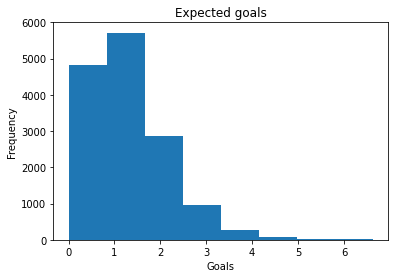

In [ ]:
plt.hist(train['xG'], bins=8)
plt.ylim()
plt.yticks()
plt.ylabel("Frequency")
plt.xlabel("Goals")
plt.title('Expected goals')

Text(0.5, 1.0, 'Expected goals against')

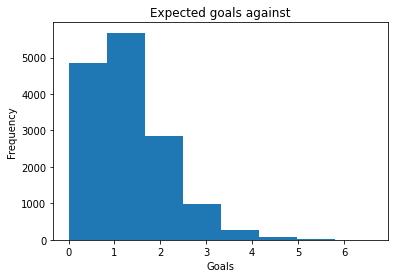

In [ ]:
plt.hist(train['xGA'], bins=8)
plt.ylim()
plt.yticks()
plt.ylabel("Frequency")
plt.xlabel("Goals")
plt.title('Expected goals against')

In [ ]:
# Dependence/correlation 

In [ ]:
corr = train[['wins','scored','xG']].corr() # ,'xGA','deep','deep_allowed' 
corr.style.background_gradient(cmap='Pastel2')
#corr.style.render()

,wins,scored,xG
wins,1.000000,0.643718,0.448137
scored,0.643718,1.000000,0.647021
xG,0.448137,0.647021,1.000000


## Probability distribution

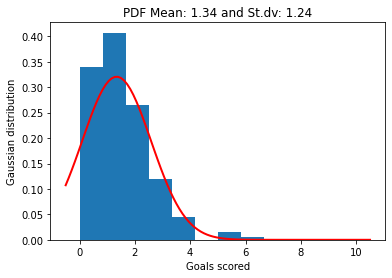

In [ ]:
mu, std = norm.fit(train["scored"]) 
  
plt.hist(train["scored"], bins=12, density=True,)
  
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2, color='red')
title = "PDF Mean: {:.2f} and St.dv: {:.2f}".format(mu, std)
plt.ylabel('Gaussian distribution')
plt.xlabel('Goals scored')
plt.title(title)
  
plt.show()

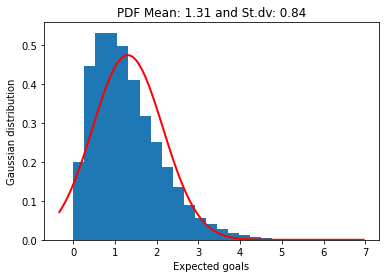

In [ ]:
mu, std = norm.fit(train["xG"]) 
  
plt.hist(train["xG"], bins=25, density=True,)
  
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2, color='red')
title = "PDF Mean: {:.2f} and St.dv: {:.2f}".format(mu, std)
plt.ylabel('Gaussian distribution')
plt.xlabel('Expected goals')
plt.title(title)
  
plt.show()

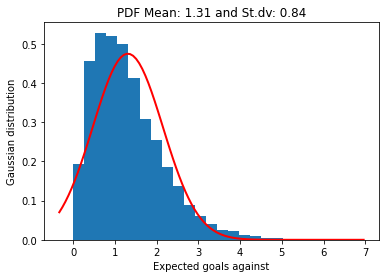

In [ ]:
mu, std = norm.fit(train["xGA"]) 
  
plt.hist(train["xGA"], bins=25, density=True,)
  
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2, color='red')
title = "PDF Mean: {:.2f} and St.dv: {:.2f}".format(mu, std)
plt.ylabel('Gaussian distribution')
plt.xlabel('Expected goals against')
plt.title(title)
  
plt.show()

## Predictive analasys 

In [ ]:
# Two Predictive models 

In [ ]:
# Model 1: Linear regression 

In [ ]:
# y = b0 + b1X  

### Train Linear 

In [ ]:
x=train['scored']
y=train['wins']

In [ ]:
# train
model = LinearRegression(normalize=True)
model.fit(x[:, np.newaxis], y) # f(x) = kx + m - regression line

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [ ]:
x = np.array(x).reshape(-1,1)

In [ ]:
model.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [ ]:
x_shape = np.array([0,10])
y_shape= model.predict(x_shape[:,np.newaxis])

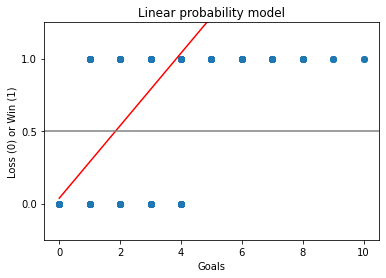

In [ ]:
plt.scatter(x,y)
plt.plot(x_shape, y_shape, color='red')
plt.ylim(-0.25, 1.25)
plt.yticks([0, 0.5, 1])
plt.ylabel("Loss (0) or Win (1)")
plt.xlabel("Goals")
plt.axhline(0.5, color=".5")
plt.title('Linear probability model')
plt.show()

In [ ]:
intercept = model.intercept_
coef = model.coef_
print('intercept: ', model.intercept_)
print('coeficent: ', model.coef_)

intercept:  0.03729180062532644
coeficent:  [0.25021591]


In [ ]:
def mean_squared_error_custom(truth, predicted):
    m = truth.shape[0]
    mse = (np.sum((predicted - truth)**2)) / (2*m)
    return mse

In [ ]:
# add verification 
print(mean_squared_error_custom(train['scored'], np.shape(y_shape)))
print(mean_squared_error_custom(train['wins'], np.shape(y_shape)))

0.9908801193382154
1.4407038242473555


### Test Linear

In [ ]:
# test
model = LinearRegression(normalize=True)
model.fit(test['scored'][:, np.newaxis], test['wins']) # f(x) = kx + m - regression line
xx = np.array(test['scored']).reshape(-1,1)
model.fit(xx,test['wins'])
x_shape = np.array([0,10])
y_shape= model.predict(x_shape[:,np.newaxis])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/pyth

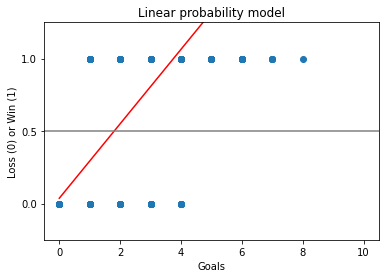

In [ ]:
plt.scatter(xx,test['wins'])
plt.plot(x_shape, y_shape, color='red')
plt.ylim(-0.25, 1.25)
plt.yticks([0, 0.5, 1])
plt.ylabel("Loss (0) or Win (1)")
plt.xlabel("Goals")
plt.axhline(0.5, color=".5")
plt.title('Linear probability model')
plt.show()

In [ ]:
intercept = model.intercept_
coef = model.coef_
print('intercept: ', model.intercept_)
print('coeficent: ', model.coef_)

intercept:  0.03673493738390948
coeficent:  [0.25688868]


In [ ]:
def mean_squared_error_custom(truth, predicted):
    m = truth.shape[0]
    mse = (np.sum((predicted - truth)**2)) / (2*m)
    return mse

In [ ]:
# add verification 
print(mean_squared_error_custom(test['scored'], np.shape(y_shape)))
print(mean_squared_error_custom(test['wins'], np.shape(y_shape)))

0.9730471928397071
1.4196501220504476


### Train Logit


In [ ]:
# Logit  Train  Validation Test 

In [ ]:
x = train['scored']
x_test = test['scored'] 
y_test = test['wins'] 
y = train['wins']

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(np.array(x).reshape(-1,1))
X_test = sc.transform(np.array(x_test).reshape(-1,1))


classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y)



LogisticRegression(random_state=0)

Confusion matrix, with Logistic regression
[[0.84960536 0.15039464]
 [0.23895254 0.76104746]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


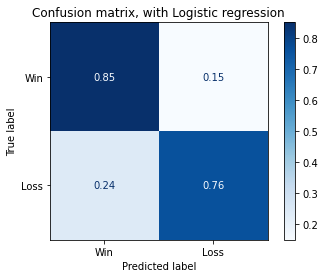

In [ ]:

title = 'Confusion matrix, with Logistic regression'
names= ['Win','Loss']
display = plot_confusion_matrix(classifier, X_train, y,display_labels=names, cmap=plt.cm.Blues, normalize='true')


display.ax_.set_title(title)
print(title)
print(display.confusion_matrix)

plt.title('Confusion matrix, with Logistic regression')
plt.show()

In [ ]:
clf = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
clf.fit(X_train, y)

LogisticRegression(random_state=0)

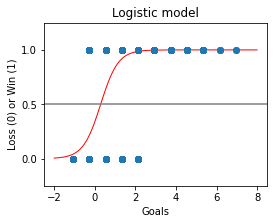

In [ ]:
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X_train.ravel(), y, zorder=20)
X_test = np.linspace(-2, 8, 300)
loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color="red", linewidth=1)
plt.ylim(-0.25, 1.25)
plt.yticks([0, 0.5, 1])
plt.ylabel("Loss (0) or Win (1)")
plt.xlabel("Goals")
plt.axhline(0.5, color=".5")
plt.title('Logistic model')
plt.show()

### Test Logit

In [ ]:
X_test = sc.transform(np.array(x_test).reshape(-1,1))
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(X_test, test['wins'])

LogisticRegression(random_state=0)

Confusion matrix, with Logistic regression
[[0.85136032 0.14863968]
 [0.23501577 0.76498423]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


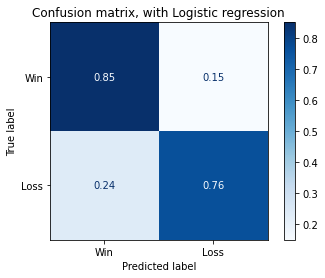

In [ ]:
title = 'Confusion matrix, with Logistic regression'
names= ['Win','Loss']
display = plot_confusion_matrix(classifier, X_test, test['wins'],display_labels=names, cmap=plt.cm.Blues, normalize='true')


display.ax_.set_title(title)
print(title)
print(display.confusion_matrix)

plt.title('Confusion matrix, with Logistic regression')
plt.show()

In [ ]:
X_test = sc.transform(np.array(x_test).reshape(-1,1))
clf = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
clf.fit(X_test, y_test)

LogisticRegression(random_state=0)

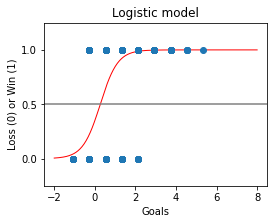

In [ ]:
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X_test.ravel(), test['wins'], zorder=20)
X_test = np.linspace(-2, 8, 300)
loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color="red", linewidth=1)
plt.ylim(-0.25, 1.25)
plt.yticks([0, 0.5, 1])
plt.ylabel("Loss (0) or Win (1)")
plt.xlabel("Goals")
plt.axhline(0.5, color=".5")
plt.title('Logistic model')
plt.show()

### Random Forest Train

In [ ]:
# Model 2: Random forest????? 

In [ ]:
Y_train = sc.fit_transform(np.array(y).reshape(-1,1))
X_val = sc.fit_transform(np.array(validate['xG']).reshape(-1,1))
X_train=sc.fit_transform(np.array(train['xG']).reshape(-1,1))

>0.1 0.705 (0.013)
>0.2 0.693 (0.011)
>0.3 0.683 (0.012)
>0.4 0.675 (0.012)
>0.5 0.670 (0.012)
>0.6 0.661 (0.013)
>0.7 0.649 (0.012)
>0.8 0.638 (0.013)
>0.9 0.634 (0.014)
>1.0 0.634 (0.013)


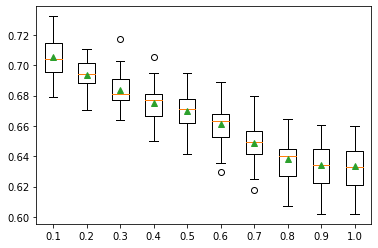

In [ ]:
# explore random forest bootstrap sample size on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# explore ratios from 10% to 100% in 10% increments
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		# set max_samples=None to use 100%
		if i == 1.0:
			i = None
		models[key] = RandomForestClassifier(max_samples=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train, train['wins'])
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
print(mean(evaluate_model(model, X_train, train['wins'])))

0.6337806499091597


In [ ]:
print(models)

{'0.1': RandomForestClassifier(max_samples=0.1), '0.2': RandomForestClassifier(max_samples=0.2), '0.3': RandomForestClassifier(max_samples=0.30000000000000004), '0.4': RandomForestClassifier(max_samples=0.4), '0.5': RandomForestClassifier(max_samples=0.5), '0.6': RandomForestClassifier(max_samples=0.6), '0.7': RandomForestClassifier(max_samples=0.7000000000000001), '0.8': RandomForestClassifier(max_samples=0.8), '0.9': RandomForestClassifier(max_samples=0.9), '1.0': RandomForestClassifier()}


In [ ]:
models['1.0'].fit(X_train,train['wins'])

RandomForestClassifier()

In [ ]:
y_pred = models['1.0'].predict(X_val)

In [ ]:
print(confusion_matrix(validate['wins'],y_pred))

[[2418  710]
 [ 652 1136]]


Confusion matrix, with Logistic regression
[[0.7730179  0.2269821 ]
 [0.36465324 0.63534676]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


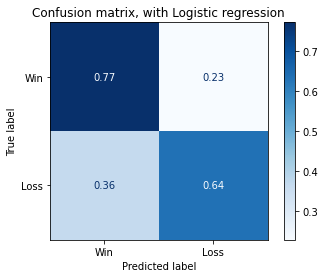

In [ ]:
title = 'Confusion matrix, with Logistic regression'
names= ['Win','Loss']
display = plot_confusion_matrix(models['1.0'].fit(X_train,train['wins']),X_val, validate['wins'], display_labels=names, cmap=plt.cm.Blues, normalize='true')


display.ax_.set_title(title)
print(title)
print(display.confusion_matrix)

plt.title('Confusion matrix, with Logistic regression')
plt.show()

### Test Random Forest

In [ ]:
X_test = sc.fit_transform(np.array(test['xG']).reshape(-1,1))

In [ ]:
y_pred = models['1.0'].predict(X_test)
print(confusion_matrix(test['wins'],y_pred))

[[2340  674]
 [ 712 1190]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, with Logistic regression
[[0.77637691 0.22362309]
 [0.3743428  0.6256572 ]]


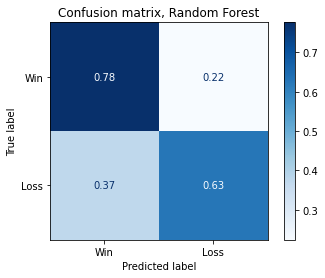

In [ ]:
title = 'Confusion matrix, with Logistic regression'
names= ['Win','Loss']
display = plot_confusion_matrix(models['1.0'].fit(X_train,train['wins']),X_test, test['wins'], display_labels=names, cmap=plt.cm.Blues, normalize='true')


display.ax_.set_title(title)
print(title)
print(display.confusion_matrix)

plt.title('Confusion matrix, Random Forest')
plt.show()